In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold


In [2]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\5 - EF - ReFeature Select\df_CDCA6.csv")
#df_All = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [5]:
# # List of columns to exclude to run XGboost feature selection
exclude_columns = ['Date', 
# 'FFC55553' ,'LC55555', 'LC55557','FFC55555', 'Decanol', 
'C10_spec'
 #'FC55003', 'TI55021', 'LC55553' 
 ]

# # Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [6]:
print(df_All.describe())

            Butanol       425 %Al       TC55552       Decanol       FC55569  \
count  13264.000000  13264.000000  13264.000000  13264.000000  13264.000000   
mean      10.823413      5.891240    164.276055      1.704071   6393.395429   
std       12.612255      0.451490     12.180865      1.188208    402.441425   
min        0.100000      3.430060    123.299000      0.006067   5142.080000   
25%        3.080000      5.760980    158.042500      0.840271   6100.152500   
50%        5.395000      6.007395    164.995500      1.516710   6400.755000   
75%       12.827525      6.165667    173.197000      2.220000   6691.895000   
max       65.206600      7.096060    199.243000      6.226500   7562.490000   

            DI55152      AYC55580       FC55555       FC42428       FC55576  \
count  13264.000000  13264.000000  13264.000000  13264.000000  13264.000000   
mean       1.000727      8.553018  27555.577895  29490.294911    527.236734   
std        0.037006      3.294446   2706.958583   5

In [7]:
# Assuming your data is in filtered_df and you want to predict 'target_column_name'
X = df_All.drop('Butanol', axis=1)  # Replace 'target_column_name' with your target column's name
y = df_All['Butanol']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    learning_rate=0.03,
    n_estimators=800,
    max_depth=9,
    subsample=0.9,
    colsample_bytree=0.8,
    gamma=0.5,
    alpha=0.1,
    reg_lambda=1,
    colsample_bylevel=0.8,
    colsample_bynode=0.7
)
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=0.7, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11.408392473656914


In [12]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.3776311926640115


In [13]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.2f}")

R-squared value: 0.93


In [14]:
current_features = X.columns.tolist()

# Calculate Adjusted R-squared
def adjusted_r2(r2, n, k):
    """
    Compute the adjusted R^2 from R^2, number of samples (n) and number of predictors (k).
    
    Args:
    - r2 (float): R^2 value
    - n (int): number of samples
    - k (int): number of predictors

    Returns:
    - float: adjusted R^2 value
    """
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


adj_r2 = adjusted_r2(r2, len(y_test), len(current_features))

print(f"Adjusted R^2 value: {adj_r2}")

Adjusted R^2 value: 0.9315585418957757


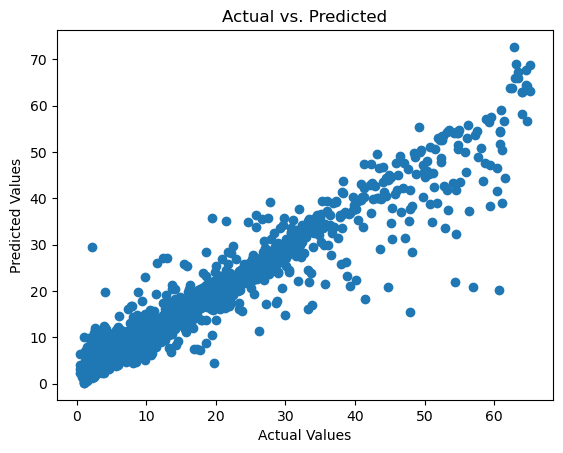

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


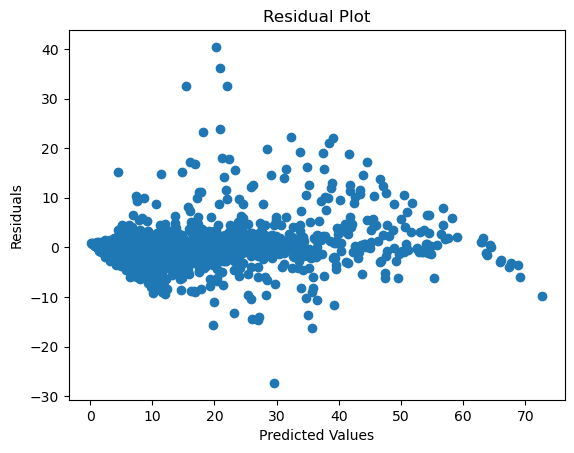

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Define the K-fold cross validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Take the square root of the scores to get the RMSE
rmse_scores = np.sqrt(-scores)

# Print out the results
print(f'Scores for each fold are: {rmse_scores}')
print(f'Average RMSE: {np.mean(rmse_scores)}')
print(f'Standard deviation of RMSE: {np.std(rmse_scores)}')

Scores for each fold are: [4.2595702  4.73388315 4.80672788 4.64247888 4.67236446]
Average RMSE: 4.623004915643074
Standard deviation of RMSE: 0.19023591086016983
